In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/bike_sharing_demand_dataset/train.csv")

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
datetime,0,0.0
season,0,0.0
holiday,0,0.0
workingday,0,0.0
weather,0,0.0
temp,0,0.0
atemp,0,0.0
humidity,0,0.0
windspeed,0,0.0
casual,0,0.0


In [9]:
df['date'] =df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [10]:
df['date'][2]

datetime.date(2011, 1, 1)

In [11]:
df['year'] = df['datetime'].dt.year.astype(float)
df['month'] = df['datetime'].dt.month.astype(float)
df['day'] = df['datetime'].dt.day.astype(float)
df['day_of_week'] = pd.to_datetime(df['datetime']).dt.dayofweek.astype(float)
df['hour']=df['datetime'].dt.hour.astype(float)

In [12]:
type(df['year'][3])

numpy.float64

In [13]:
type(df['hour'][3])

numpy.float64

In [14]:
type(df['day_of_week'][3])

numpy.float64

In [15]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'time', 'year', 'month', 'day', 'day_of_week', 'hour'],
      dtype='object')

In [16]:
df = df.drop(columns=['datetime', 'holiday', 'temp', 'casual','registered', 'date', 'time','day'], axis = 1)

In [17]:
df.columns

Index(['season', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'count', 'year', 'month', 'day_of_week', 'hour'],
      dtype='object')

[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0'),
 Text(7, 0, '7.0'),
 Text(8, 0, '8.0'),
 Text(9, 0, '9.0'),
 Text(10, 0, '10.0'),
 Text(11, 0, '11.0'),
 Text(12, 0, '12.0'),
 Text(13, 0, '13.0'),
 Text(14, 0, '14.0'),
 Text(15, 0, '15.0'),
 Text(16, 0, '16.0'),
 Text(17, 0, '17.0'),
 Text(18, 0, '18.0'),
 Text(19, 0, '19.0'),
 Text(20, 0, '20.0'),
 Text(21, 0, '21.0'),
 Text(22, 0, '22.0'),
 Text(23, 0, '23.0')]

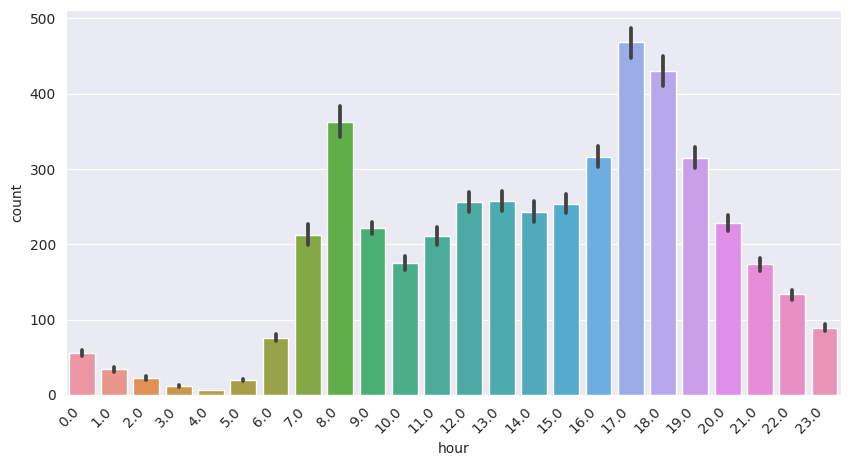

In [18]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['hour'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

<Axes: xlabel='hour'>

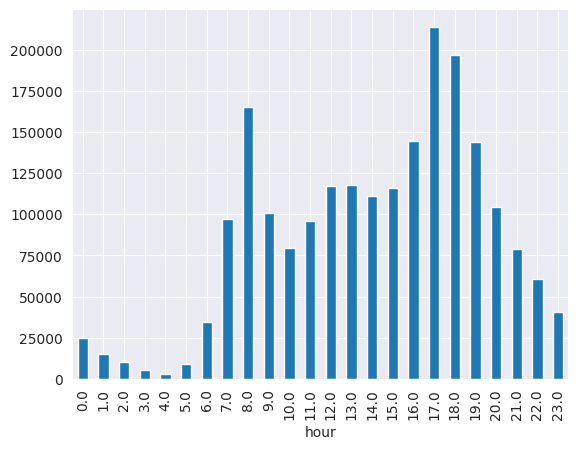

In [19]:
df.groupby('hour')['count'].sum().plot.bar()

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

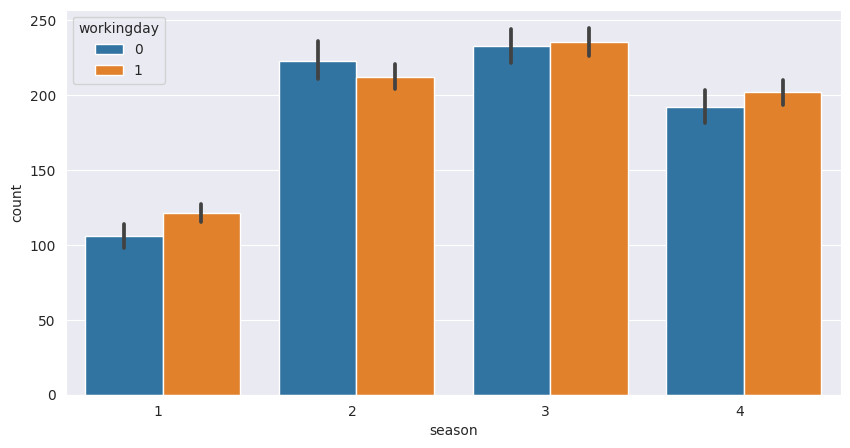

In [20]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['season'], y = df['count'], hue = df['workingday'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

In [21]:
df['year']

0        2011.0
1        2011.0
2        2011.0
3        2011.0
4        2011.0
          ...  
10881    2012.0
10882    2012.0
10883    2012.0
10884    2012.0
10885    2012.0
Name: year, Length: 10886, dtype: float64

[Text(0, 0, '2011.0'), Text(1, 0, '2012.0')]

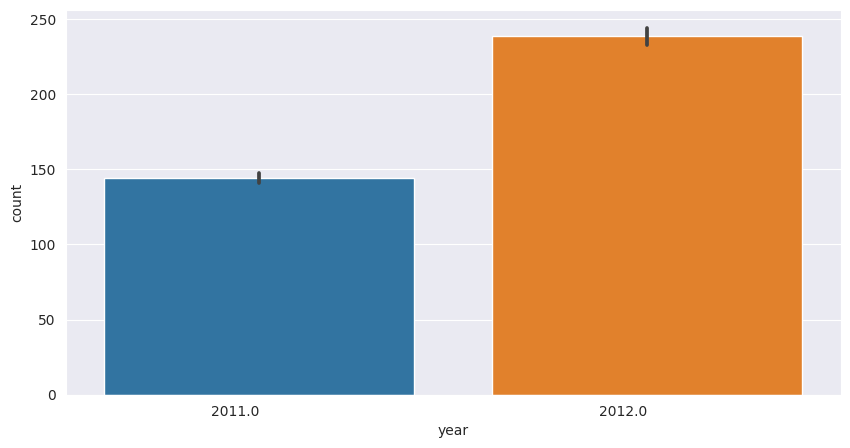

In [22]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['year'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '10.0'),
 Text(10, 0, '11.0'),
 Text(11, 0, '12.0')]

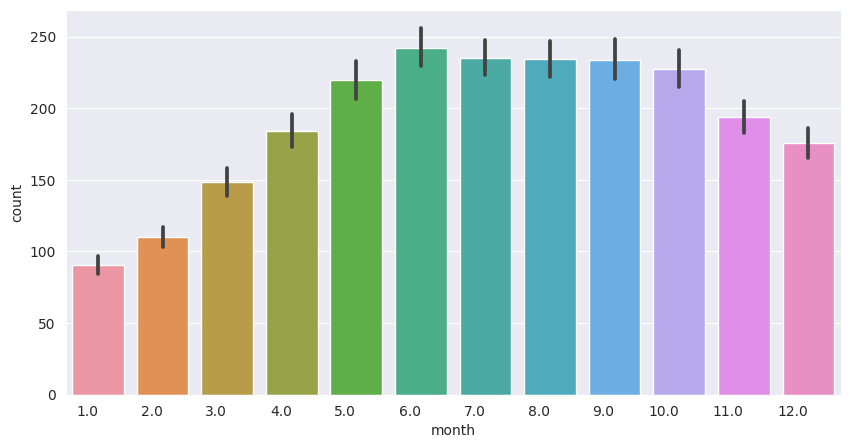

In [23]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['month'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0')]

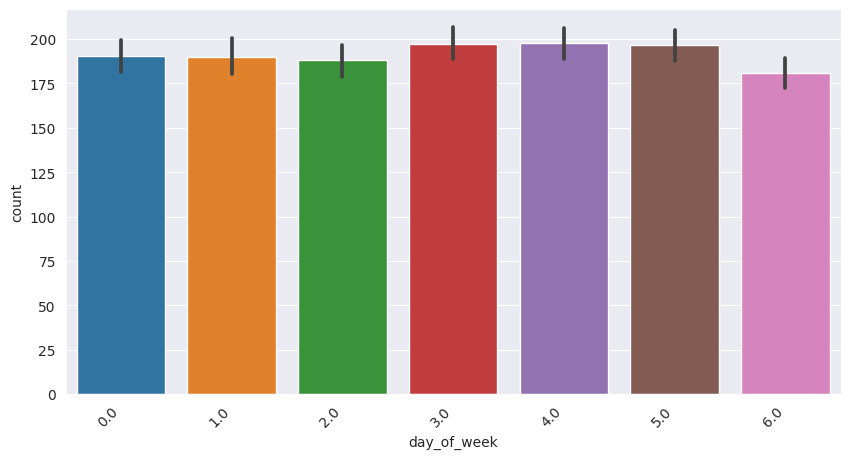

In [24]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['day_of_week'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

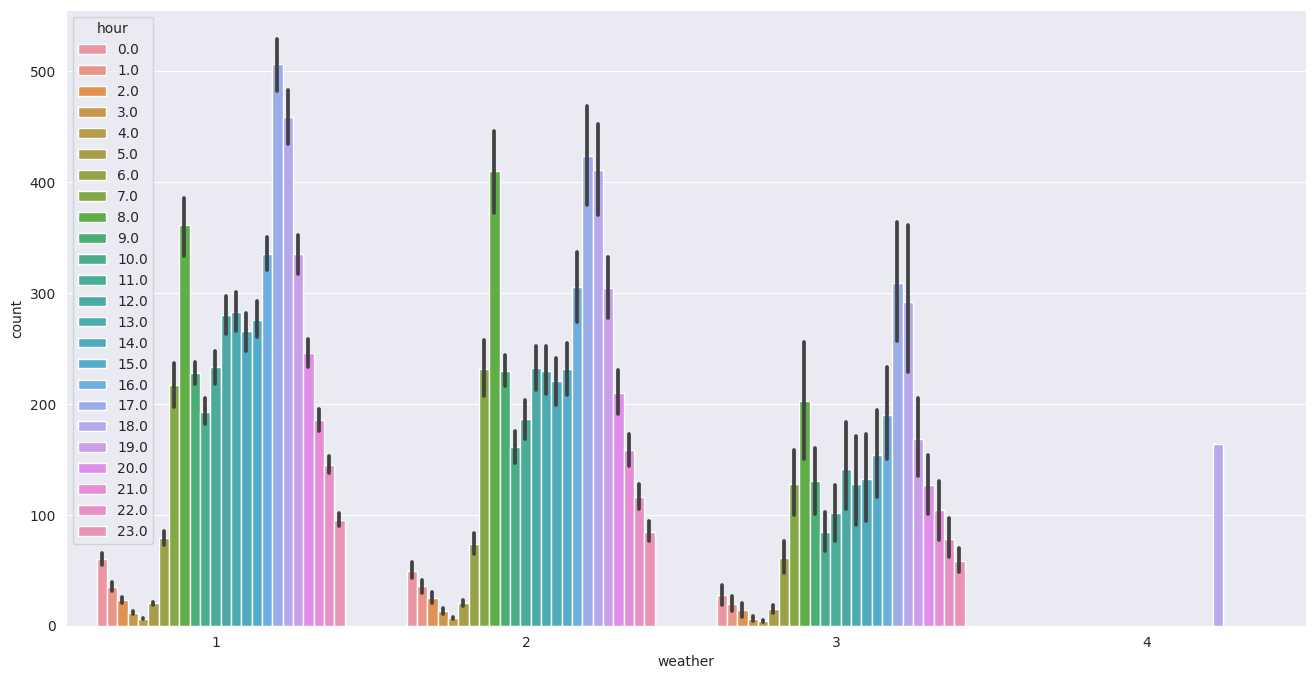

In [25]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['weather'], y = df['count'], hue= df['hour'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

In [26]:
#for working days:
#rush_hour = {7: 'rush_mor', 8:'rush_mor', 9:'rush_mor', 17:'rush_eve', 18:'rush_eve', 19:'rush_eve', 11: 'vac_day', 12: 'vac_day', 13:'', 14:'', 15:'', 16:''}

In [27]:
#df['rush_hour']= df['time'].map(rush_hour)

In [28]:
df.shape

(10886, 11)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)

In [30]:
corrMatrix =pd.DataFrame(X_train.corr())
print(corrMatrix)

               season  workingday   weather     atemp  humidity  windspeed  \
season       1.000000    0.001322  0.010093  0.259334  0.193355  -0.143768   
workingday   0.001322    1.000000  0.033554  0.023029 -0.002480   0.006431   
weather      0.010093    0.033554  1.000000 -0.056270  0.406415   0.008169   
atemp        0.259334    0.023029 -0.056270  1.000000 -0.051131  -0.052358   
humidity     0.193355   -0.002480  0.406415 -0.051131  1.000000  -0.316548   
windspeed   -0.143768    0.006431  0.008169 -0.052358 -0.316548   1.000000   
count        0.162900    0.013213 -0.127838  0.385754 -0.318591   0.102783   
year        -0.007058   -0.000157 -0.012606  0.055844 -0.077943  -0.013371   
month        0.971643    0.007410  0.014058  0.258461  0.207720  -0.146692   
day_of_week -0.014511   -0.699397 -0.043572 -0.044187 -0.034383  -0.016929   
hour        -0.013241    0.005642 -0.026890  0.136883 -0.281665   0.151718   

                count      year     month  day_of_week      hou

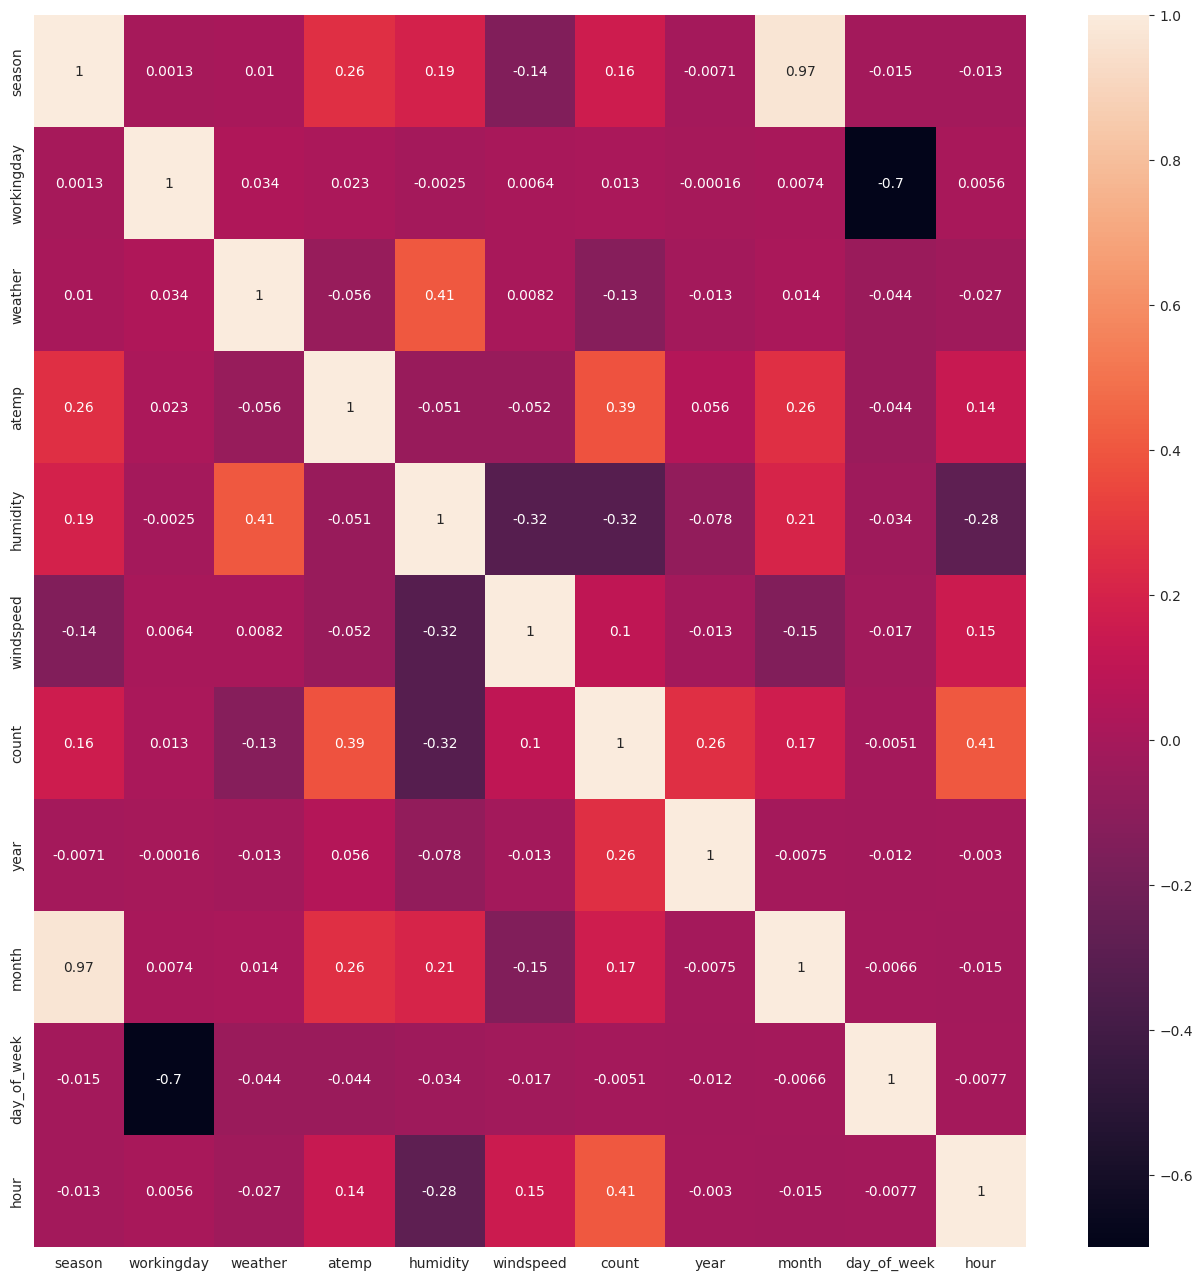

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [32]:
set(df['windspeed'])

{0.0,
 6.0032,
 7.0015,
 8.9981,
 11.0014,
 12.998,
 15.0013,
 16.9979,
 19.0012,
 19.9995,
 22.0028,
 23.9994,
 26.0027,
 27.9993,
 30.0026,
 31.0009,
 32.9975,
 35.0008,
 36.9974,
 39.0007,
 40.9973,
 43.0006,
 43.9989,
 46.0022,
 47.9988,
 50.0021,
 51.9987,
 56.9969}

In [33]:
set(df['atemp'])

{0.76,
 1.515,
 2.275,
 3.03,
 3.79,
 4.545,
 5.305,
 6.06,
 6.82,
 7.575,
 8.335,
 9.09,
 9.85,
 10.605,
 11.365,
 12.12,
 12.88,
 13.635,
 14.395,
 15.15,
 15.91,
 16.665,
 17.425,
 18.18,
 18.94,
 19.695,
 20.455,
 21.21,
 21.97,
 22.725,
 23.485,
 24.24,
 25.0,
 25.76,
 26.515,
 27.275,
 28.03,
 28.79,
 29.545,
 30.305,
 31.06,
 31.82,
 32.575,
 33.335,
 34.09,
 34.85,
 35.605,
 36.365,
 37.12,
 37.88,
 38.635,
 39.395,
 40.15,
 40.91,
 41.665,
 42.425,
 43.18,
 43.94,
 44.695,
 45.455}

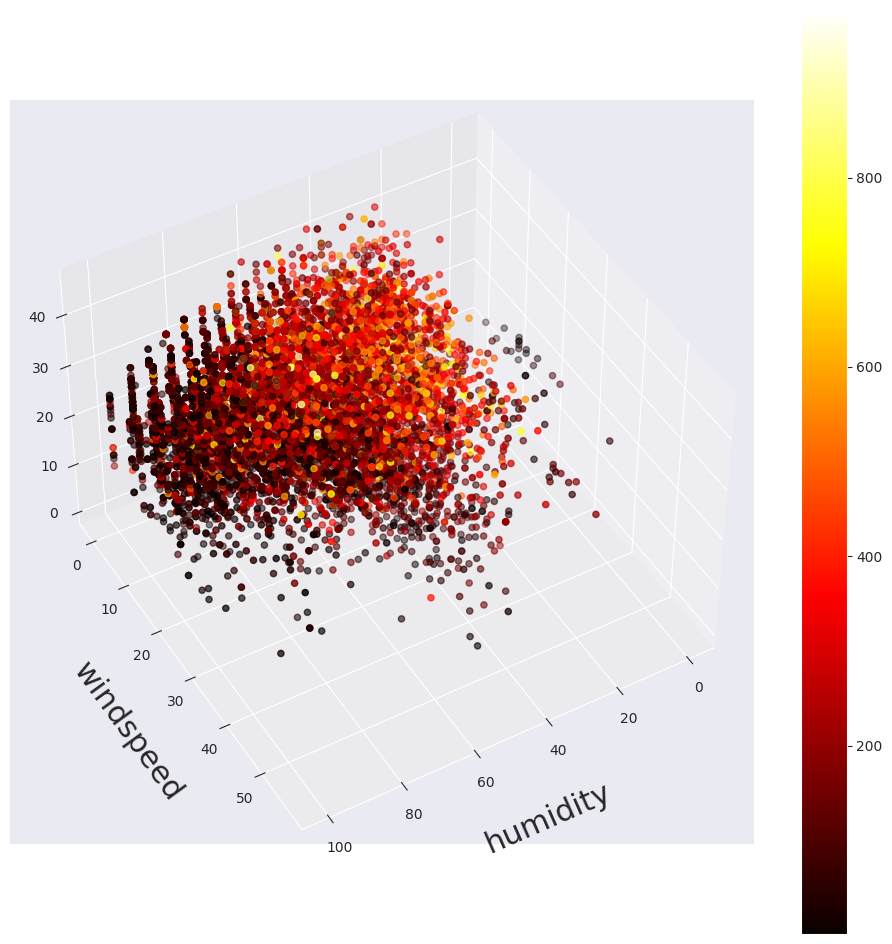

In [34]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = df['humidity']
y = df['windspeed']
z = df['atemp']
c = df['count']

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
plt.xlabel('humidity', fontsize=22, labelpad=20)
plt.ylabel('windspeed', fontsize=22, labelpad=20)
#plt.zlabel('atemp', fontsize=22, labelpad=25)
ax.view_init(45,60)
fig.colorbar(img)
plt.show()

In [35]:
y_train = X_train['count']
X_train = X_train.drop(columns = ['count'], axis=1)

In [36]:
y_test = X_test['count']
X_test = X_test.drop(columns = ['count'], axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = MinMaxScaler()
#X_train['atemp'] = pd.Series(scaler.fit_transform([X_train['atemp']]))

cols_to_norm = ['atemp','windspeed', 'humidity']
X_train[cols_to_norm] = MinMaxScaler().fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = MinMaxScaler().fit_transform(X_test[cols_to_norm])

#X_train_scaled = preprocessing.normalize(X_train)
#X_test_scaled = preprocessing.normalize(X_test)

In [38]:
#X_train_scaled

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

In [40]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predicted = linearRegressor.predict(X_test)
y_predicted_rmse = y_predicted.clip(0)

In [41]:
y_predicted_rmse.min()

0.0

In [42]:
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
msle=mean_squared_log_error(y_predicted_rmse,y_test)
rmsle=np.sqrt(msle)

print('RMLSE for the data:',rmsle)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

RMLSE for the data: 1.298125807069598
Mean Squared Error: 20107.488747072497
R score: 0.3872291041131858
Mean Absolute Error: 106.37357952957667


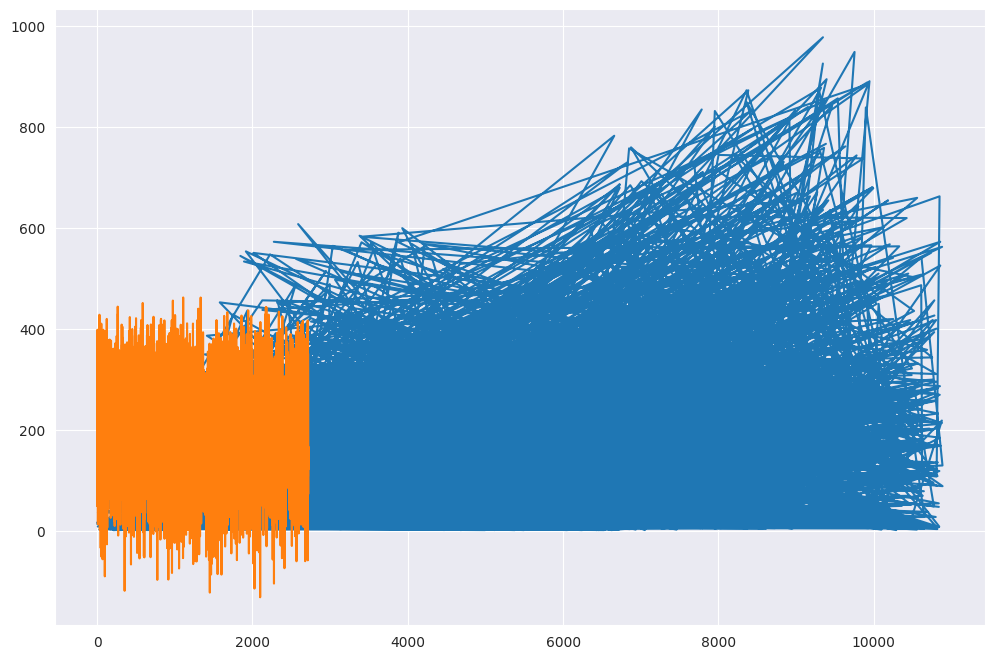

In [43]:
plt.figure(figsize=(12,8))
plt.plot(y_test)
plt.plot(y_predicted)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)
y_train = X_train['count']
X_train = X_train.drop(columns = ['count'], axis=1)
y_test = X_test['count']
X_test = X_test.drop(columns = ['count'], axis=1)

In [45]:
from statsmodels.api import OLS, add_constant
ols = OLS(y_train, add_constant(X_train))
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     520.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:40:07   Log-Likelihood:                -52016.
No. Observations:                8164   AIC:                         1.041e+05
Df Residuals:                    8153   BIC:                         1.041e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.653e+05   6345.599    -26.048      0.000   -1.78e+05   -1.53e+05
season         -6.7276      5.960     -1.129      0.259     -18.411       4.955
workingday      5.5359      4.733      1.170      0.242      -3.742      14.814
weather        -4.3989      2.775     -1.585      0.113      -9.838       1.040
atemp           6.0629      0.195     31.062      0.000       5.680       6.445
humidity       -2.0314      0.101    -20.042      0.000      -2.230      -1.833
windspeed       0.6166      0.205      3.004      0.003       0.214       1.019
year           82.1835      3.154     26.054      0.000      76.000      88.367
month           9.9003      1.943      5.096      0.000       6.092      13.708
day_of_week     1.3937      1.104      1.263      0.207      -0.770       3.558
hour            7.9619      0.240     33.236      0.000       7.492       8.432
==============================================================================
Omnibus:                     1568.211   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2974.628
Skew:                           1.183   Prob(JB):                         0.00
Kurtosis:                       4.775   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
rf = RandomForestRegressor(max_depth=5, random_state=0)
rfe = RFE(rf, n_features_to_select=3)
rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame({'support': rfe.support_, 'ranking': rfe.ranking_, 'feature': X_train.columns})
rfe_df.sort_values('ranking')

,support,ranking,feature
3,True,1,atemp
6,True,1,year
9,True,1,hour
7,False,2,month
0,False,3,season
1,False,4,workingday
8,False,5,day_of_week
4,False,6,humidity
2,False,7,weather
5,False,8,windspeed


In [47]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# # Define the parameter grid
# rf = RandomForestRegressor(random_state=0)
# rf_params = {'n_estimators': np.arange(25, 150, 25),
#              'max_depth': np.arange(1, 11, 2),
#              'min_samples_leaf': np.arange(2, 15, 3)}

# # Create the GridSearchCV object
# gs_rf = GridSearchCV(rf, rf_params, cv=3)
# gs_rf.fit(X_train, y_train)

In [48]:
# # Get the best parameters
# best_params = gs_rf.best_params_

In [49]:
# print (best_params)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

best_params = {'n_estimators': 100,
               'max_depth':  9,
               'min_samples_leaf':2
              }

# Create and fit the RandomForestRegressor with the best parameters
RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                          max_depth=best_params['max_depth'],
                          min_samples_leaf=best_params['min_samples_leaf'],
                          random_state=0)

model = RF.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the RMSLE
msle = mean_squared_log_error(y_pred, y_test)
rmsle = np.sqrt(msle)

print('RMSLE for the data:', rmsle)

RMSLE for the data: 0.36798247002373374


# Adaboost

In [51]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

best_params = {'n_estimators': 100,
               'learning_rate': 1.0,  # AdaBoost-specific parameter
              }

# Create and fit the AdaBoostRegressor with the best parameters
AdaBoostRF = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=9, min_samples_leaf=2),
                               n_estimators=best_params['n_estimators'],
                               learning_rate=best_params['learning_rate'],
                               random_state=0)

model = AdaBoostRF.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the RMSLE
msle = mean_squared_log_error(y_pred, y_test)
rmsle = np.sqrt(msle)

print('RMSLE for the data (AdaBoost):', rmsle)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


RMSLE for the data (AdaBoost): 0.864147502029648


# Stack'em Up

In [53]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.3 MB/s eta 0:00:00


In [54]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import numpy as np

# Define the base estimators
base_estimators = [
    ('random_forest', RandomForestRegressor(max_depth=9, min_samples_leaf=2, n_estimators=100, random_state=0)),
    ('adaboost', AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=9, min_samples_leaf=2),
                                   n_estimators=100, learning_rate=1.0, random_state=0)),
    ('svm', SVR(kernel='linear', C=1.0)),
    ('catboost', CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1))
]

# Create the StackingRegressor with the best parameters
stacked_model = StackingRegressor(estimators=base_estimators, final_estimator=RandomForestRegressor(), cv=5)

# Fit the StackingRegressor
stacked_model.fit(X_train, y_train)

# Predict with the StackingRegressor
y_pred = stacked_model.predict(X_test)

# Calculate the RMSLE
msle = mean_squared_log_error(y_pred, y_test)
rmsle = np.sqrt(msle)

print('RMSLE for the data (StackedRegressor):', rmsle)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 170.3053580	total: 49.5ms	remaining: 4.9s
1:	learn: 161.7322274	total: 54.5ms	remaining: 2.67s
2:	learn: 152.7584239	total: 58.1ms	remaining: 1.88s
3:	learn: 144.9809723	total: 61.9ms	remaining: 1.48s
4:	learn: 138.9580507	total: 65.7ms	remaining: 1.25s
5:	learn: 132.7077548	total: 69.4ms	remaining: 1.09s
6:	learn: 127.3875013	total: 73ms	remaining: 970ms
7:	learn: 122.8221670	total: 76.6ms	remaining: 881ms
8:	learn: 116.8515611	total: 80.2ms	remaining: 811ms
9:	learn: 111.4689914	total: 84ms	remaining: 756ms
10:	learn: 106.1342957	total: 87.6ms	remaining: 709ms
11:	learn: 101.9090674	total: 91.4ms	remaining: 670ms
12:	learn: 98.9314531	total: 95.1ms	remaining: 637ms
13:	learn: 96.4722644	total: 98.9ms	remaining: 607ms
14:	learn: 93.2736064	total: 103ms	remaining: 582ms
15:	learn: 91.3840370	total: 106ms	remaining: 559ms
16:	learn: 87.3050323	total: 111ms	remaining: 540ms
17:	learn: 84.5627787	total: 114ms	remaining: 519ms
18:	learn: 82.4011775	total: 117ms	remaining: 501ms
1

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 171.0960927	total: 1.45ms	remaining: 144ms
1:	learn: 161.3045448	total: 3.2ms	remaining: 157ms
2:	learn: 152.2903923	total: 4.58ms	remaining: 148ms
3:	learn: 144.4804785	total: 5.97ms	remaining: 143ms
4:	learn: 138.2214840	total: 7.34ms	remaining: 140ms
5:	learn: 131.3886236	total: 8.74ms	remaining: 137ms
6:	learn: 126.4098223	total: 10.1ms	remaining: 135ms
7:	learn: 121.2828782	total: 11.5ms	remaining: 132ms
8:	learn: 116.7969410	total: 12.9ms	remaining: 130ms
9:	learn: 113.1913019	total: 14.2ms	remaining: 128ms
10:	learn: 109.4948796	total: 15.6ms	remaining: 126ms
11:	learn: 104.4028624	total: 17ms	remaining: 125ms
12:	learn: 100.3113349	total: 18.4ms	remaining: 123ms
13:	learn: 96.3274955	total: 19.8ms	remaining: 122ms
14:	learn: 92.6701498	total: 21.2ms	remaining: 120ms
15:	learn: 90.7822090	total: 22.5ms	remaining: 118ms
16:	learn: 89.1003931	total: 23.9ms	remaining: 117ms
17:	learn: 85.8913882	total: 25.3ms	remaining: 115ms
18:	learn: 84.4239115	total: 26.7ms	remaining: